## Lab 7: Examining the Therapeutic Touch

Welcome to Lab 7!

After such an extensive introduction to programming for data science, we are finally moving into the section of the course where we can apply our new skills to answer real questions.  

In this lab, we'll use testing techniques that were introduced in lecture as well as in Ch. 11 to test the idea of the therapeutic touch, the idea that some practitioner can feel and massage your human energy field. 

In [1]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

### What is the Therapeutic Touch

The Therapeutic Touch (TT) is the idea that everyone can feel the Human Energy Field (HEF) around individuals. Certain practitioner claim they have the ability to feel the HEF and can massage it in order to promote health and relaxation in individuals. Those who practice TT have described different people's HEFs as "warm as Jell-O" and "tactile as taffy." 

TT was a popular technique used throughout the 20th century that was toted as a great way to bring balance to a person's health. 

### Emily Rosa

[Emily Rosa](https://en.wikipedia.org/wiki/Emily_Rosa) was a 4th grade student who was very familiar with the world of TT, thanks to her parents, who were both medical practitioners and skeptics of TT.

For her 4th grade science fair project, Emily decided to test whether or not TT practitioners could truly interact with a person's HEF. 

**Question 1:** Discuss how you would set up an experiment to test this with the individuals around you.

Some points to think about:

- What would your model be?
- How would you design your experiment to test your model? 
- How would you analyze the results of your experiment?

*Design a control group experiment which one of the group pratice TT and another group pratice something similar, and survey them after a period of time to see the result.*

### Emily's Experiment

Emily thought that the TT practitioners might just be guessing randomly; that is, their chance of successfully picking the correct hand was like the flip of a fair coin. She designed an experiment to test whether their guesses were random. We want to test whether or not the treatment has an effect, not whether or not the treatment actually works. In most medical experiments, this is the norm.

**Question 2**: Describe Emily’s model for how likely the TT practitioners are to choose the correct hand. What alternative model is her model meant to discredit? Discuss with students around you to come to a conclusion.

*Emily's model of choosing TT practitioners is random pick, which can make sure the picks are not biased. The alternative model is that the practitioners are not randomly selected.*

**Question 3:** Remember that the practitioner got the correct answer 44% (0.44) of the time. According to Emily's model, on average, what proportion of times do we expect the practitioner to guess the correct hand? Make sure your answer is between 0 and 1. 

<!--
BEGIN QUESTION
name: q1_3
-->

In [2]:
expected_proportion_correct = 0.5
expected_proportion_correct

0.5

The goal now is to see if our deviation from this expected proportion of correct answers is due to something other than chance. 

**Question 4:** We usually use a statistic to help determine which model the evidence points towards. What is a statistic that we can use to compare outcomes under Emily’s model to what was observed? Assign `valid_stat` to an array of integer(s) representing the following options: 

1. The difference between the expected percent correct and the actual percent correct
2. The absolute difference between the expected percent correct and the actual percent correct
3. The sum of the expected percent correct and the actual percent correct


<!--
BEGIN QUESTION
name: q1_4
-->

In [5]:
valid_stat = [2]
valid_stat

**Question 5:** Define the function `statistic` which takes in an expected proportion and an actual proportion, and returns the value of the statistic chosen above. Assume that you are taking in proportions, but you want to return your answer as a percentage. 

*Hint:* Remember we are asking for a **percentage**, not a proportion. 

<!--
BEGIN QUESTION
name: q1_5
-->

In [3]:
def statistic(expected_prop, actual_prop):
    return (abs(expected_prop - actual_prop) * 100)

**Question 6:** Use your newly defined function to calculate the observed statistic from Emily's experiment. 

<!--
BEGIN QUESTION
name: q1_6
-->

In [5]:
observed_statistic = statistic(expected_proportion_correct, 0.44)
observed_statistic

6.0

**Is this observed statistic consistent with what we might see under Emily’s model?**

In order to answer this question, we must simulate the experiment as though Emily's model was correct, and calculate our statistic for every simulation.

**Question 7:** To begin simulating, we should start by creating a representation of Emily's model to use for our simulation. This will be an array with two items in it. The first item should be the proportion of times, assuming that Emily’s model was correct, a TT practictioner picks the correct hand. The second item should be the proportion of times, under the same assumption, that the TT practitioner picks the incorrect hand. Assign `model_proportions` to this array. 

After this, we can simulate 210 hand choices, as Emily evaluated in real life, and find a single statistic to summarize this instance of the simulation. Use the `sample_proportions` function and assign the proportion of correct hand choices (out of 210) to `simulation_proportion_correct`. Lastly, use your statistic function to assign `one_statistic`  to the value of the statistic for this one simulation.

*Hint:* `sample_proportions` usage can be found [here](http://data8.org/su19/python-reference.html).

<!--
BEGIN QUESTION
name: q1_7
-->

In [35]:
model_proportions = make_array(.5,.5)
simulation_proportion_correct = sample_proportions(210, model_proportions).item(0)
one_statistic = statistic(expected_proportion_correct, simulation_proportion_correct)
one_statistic

2.857142857142858

**Question 8:** Let's now see what the distribution of statistics is actually like under Emily's model. 

Define the function `simulation_and_statistic` to take in the `model_proportions` array and the expected proportion of times a TT practitioner would guess a hand correctly under Emily's model. The function should simulate Emily running through the experiment 210 times and return the statistic of this one simulation. 

Using this function, assign `simulated_statistics` to an array of 1000 statistics that you calculated under the assumption that Emily's model was true.


*Hint:* This should follow the same pattern as normal simulations, in combination with the code you did in the previous problem.  

In [36]:
def simulation_and_statistic(model_proportions, expected_proportion_correct):
    '''Simulates 210 TT hand choices under Emily’s model. 
    Returns one statistic from the simulation.'''
    num = 1000
    result = make_array()
    simulation_proportion_correct = sample_proportions(210, model_proportions).item(0)
    one_statistic = statistic(expected_proportion_correct, simulation_proportion_correct)
    result = np.append(one_statistic, one_statistic)
    return result

Now using the function you've just created, conduct the appropriate simulation.

<!--
BEGIN QUESTION
name: q1_8
-->

In [37]:
num_repetitions = 1000

simulated_statistics = make_array()

for i in np.arange(num_repetitions):
    simulation_proportion_correct = sample_proportions(210, model_proportions).item(0)
    simulated_statistics = statistic(expected_proportion_correct, simulation_proportion_correct)
    simulated_statistics = np.append(simulated_statistics, simulated_statistics)

Let's view the distribution of the simulated statistics under Emily's model, and visually compare where the observed statistic lies relative to the simulated statistics.

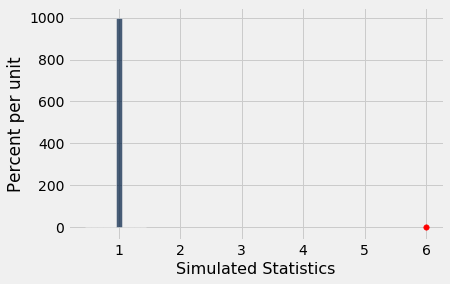

In [41]:
t = Table().with_column('Simulated Statistics', simulated_statistics)
t.hist()
plt.scatter(observed_statistic, 0, color='red', s=30);

We can make a visual argument as to whether we believe the observed statistic is consistent with Emily’s model. Here, since larger values of the test statistic suggest the alternative model (where the chance of guessing the correct hand is something other than 50%), we can formalize our analysis by finding what proportion of simulated statistics were as large or larger than our observed test statistic (the area at or to the right of the observed test statistic). If this area is small enough, we’ll declare that the observed data are inconsistent with our simulated model.

**Question 9:** Calculate the proportion of simulated statistics greater than or equal to the observed statistic. 

<!--
BEGIN QUESTION
name: q1_9
-->

In [43]:
proportion_greater_or_equal = simulated_statistics - observed_statistic
proportion_greater_or_equal

array([-5.04761905, -5.04761905])

By convention, we often compare the proportion we just calculated to 0.05. If the proportion of simulated statistics greater than or equal to the observed statistic is sufficiently small (less than or equal to 0.05), then this is evidence against Emily's model. Otherwise, we don’t have any reason to doubt Emily’s model. Note that this does **not** say that we accept Emily's model, but rather, that we just **fail to reject it**.

This should help you make your own conclusions about Emily Rosa's experiment. 

Therapeutic touch fell out of use after this experiment, which was eventually accepted into one of the premier medical journals. TT practitioners hit back and accused Emily and her family of tampering with the results, while some claimed that Emily's bad spiritual mood towards therapeutic touch made it difficult to read her HEF. Whatever it may be, Emily's experiment is a classic example about how anyone, with the right resources, can test anything they want!

Think to yourself and be prepared to talk with your learning assistant and TA about the following questions as you get checked off: 

1. Do we reject Emily's model, or fail to reject it? 
2. What does this mean in terms of Emily's experiment? Do the TT practitioners' answers follow an even chance model or is there something else at play? 